# 2.2 Integration with pandas data frames

As was shown earlier, we can use indexes to search for specific data points.
One way to operate on the data is using pandas data frames.

*Please note: The following steps require the pandas package.*

In [1]:
import signac
import pandas as pd

project = signac.get_project(root='projects/tutorial')

Let's first create a basic index and use it to construct an index data frame:

In [2]:
df_index = pd.DataFrame(project.index())
df_index.head()

,V_gas,V_liq,_id,fluid,signac_id,statepoint
0,416.269974,32.803386,732fb26b0b6fb83687625248b1f0a0b6,argon,732fb26b0b6fb83687625248b1f0a0b6,"{'b': 0.03201, 'kT': 1.0, 'a': 1.355, 'p': 1.2..."
1,64.017777,30.659575,fdfd39a204f42e56bbe1b9c861674430,water,fdfd39a204f42e56bbe1b9c861674430,"{'b': 0.03049, 'kT': 1.0, 'a': 5.536, 'p': 7.8..."
2,56.095004,30.659543,e578035d17bbb374a03d4af7c3f9ecaa,water,e578035d17bbb374a03d4af7c3f9ecaa,"{'b': 0.03049, 'kT': 1.0, 'a': 5.536, 'p': 8.9..."
3,89.200895,30.659639,4ab285cfbe721ca068b2b50a5facc0e1,water,4ab285cfbe721ca068b2b50a5facc0e1,"{'b': 0.03049, 'kT': 1.0, 'a': 5.536, 'p': 5.6..."
4,146.662857,32.801933,86c86b7faa93d1cf66db720182170da1,argon,86c86b7faa93d1cf66db720182170da1,"{'b': 0.03201, 'kT': 1.0, 'a': 1.355, 'p': 3.4..."


It is a good idea, to explicitly use the `_id` value as index key:

In [3]:
df_index = df_index.set_index(['_id'])
df_index.head()

,V_gas,V_liq,fluid,signac_id,statepoint
_id,,,,,
732fb26b0b6fb83687625248b1f0a0b6,416.269974,32.803386,argon,732fb26b0b6fb83687625248b1f0a0b6,"{'b': 0.03201, 'kT': 1.0, 'a': 1.355, 'p': 1.2..."
fdfd39a204f42e56bbe1b9c861674430,64.017777,30.659575,water,fdfd39a204f42e56bbe1b9c861674430,"{'b': 0.03049, 'kT': 1.0, 'a': 5.536, 'p': 7.8..."
e578035d17bbb374a03d4af7c3f9ecaa,56.095004,30.659543,water,e578035d17bbb374a03d4af7c3f9ecaa,"{'b': 0.03049, 'kT': 1.0, 'a': 5.536, 'p': 8.9..."
4ab285cfbe721ca068b2b50a5facc0e1,89.200895,30.659639,water,4ab285cfbe721ca068b2b50a5facc0e1,"{'b': 0.03049, 'kT': 1.0, 'a': 5.536, 'p': 5.6..."
86c86b7faa93d1cf66db720182170da1,146.662857,32.801933,argon,86c86b7faa93d1cf66db720182170da1,"{'b': 0.03201, 'kT': 1.0, 'a': 1.355, 'p': 3.4..."


Furthermore, the index would be more useful if each statepoint parameter had its own column.

In [4]:
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
df = pd.DataFrame(statepoints).T.join(df_index)
df.head()

,N,a,b,kT,p,V_gas,V_liq,fluid,signac_id,statepoint
0e909ffdba496bbb590fbce31f3a4563,1000.0,0.000,0.00000,1.0,3.400,294.117647,0.000000,ideal gas,0e909ffdba496bbb590fbce31f3a4563,"{'b': 0, 'kT': 1.0, 'a': 0, 'p': 3.40000000000..."
10743bc8b95bffab09503bce9abbe627,1000.0,0.000,0.00000,1.0,0.100,10000.000000,0.000000,ideal gas,10743bc8b95bffab09503bce9abbe627,"{'b': 0, 'kT': 1.0, 'a': 0, 'p': 0.1, 'N': 1000}"
11d8997f19b8ba53d2360ee9fb1606fa,1000.0,5.536,0.03049,1.0,1.200,416.581783,30.659767,water,11d8997f19b8ba53d2360ee9fb1606fa,"{'b': 0.03049, 'kT': 1.0, 'a': 5.536, 'p': 1.2..."
195c26531df979e70d8f50267f67f0e5,1000.0,0.000,0.00000,1.0,7.525,132.890365,0.000000,NaN,195c26531df979e70d8f50267f67f0e5,"{'b': 0, 'kT': 1.0, 'a': 0, 'p': 7.525, 'N': 1..."
1f147aff97cbbda8aa7c4457a9b51159,1000.0,1.355,0.03201,1.0,4.500,110.715506,32.801209,argon,1f147aff97cbbda8aa7c4457a9b51159,"{'b': 0.03201, 'kT': 1.0, 'a': 1.355, 'p': 4.5..."


Now we can select specific data subsets, for example to calculate the mean gas volume of argon for a pressure *p* between 2.0 and 5.0:

In [5]:
df[(df.fluid=='argon') & (df.p > 2.0) & (df.p <= 5.0)].V_gas.mean()

158.12444608049668

Or we can plot a p-V phase diagram for argon (*requires matplotlib*).

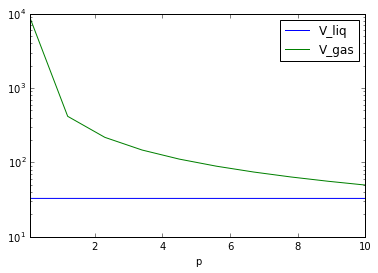

In [6]:
% matplotlib inline

df_water = df[df.fluid=='argon'][['p', 'V_liq', 'V_gas']]
df_water.sort_values('p').set_index('p').plot(logy=True)

Or we group the data by fluid and compare the gas densities for low pressures:

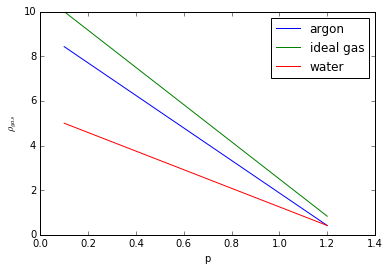

In [7]:
from matplotlib import pyplot as plt

for fluid, group in df[df.p < 2].groupby('fluid'):
    d = group.sort_values('p')
    plt.plot(d['p'], d['V_gas'] / d['N'], label=fluid)
plt.xlabel('p')
plt.ylabel(r'$\rho_{gas}$')
plt.legend(loc=0)